# Camera Caribration

##  Criteria
Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

## MEETS SPECIFICATIONS
OpenCV functions or other methods were used to calculate the correct camera matrix and distortion coefficients using the calibration chessboard images provided in the repository (note these are 9x6 chessboard images, unlike the 8x6 images used in the lesson). The distortion matrix should be used to un-distort one of the calibration images provided as a demonstration that the calibration is correct. Example of undistorted calibration image is Included in the writeup (or saved to a folder).


In [1]:
import glob, os
import pickle

from PIL import Image

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Prepare object points and Find corners as image points

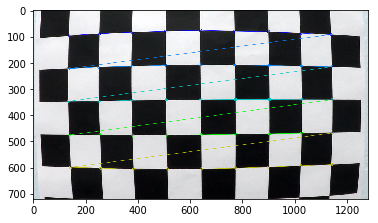

In [2]:
# prepare object points
nx = 9 # the number of inside corners in x
ny = 5 # the number of inside corners in y

objectpoint = np.zeros((nx * ny, 3), np.float32)
objectpoint[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Make a list of calibration images
image = cv2.imread("./camera_cal/calibration1.jpg")
objectpoints = []
imagepoints = []

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_shape = gray.shape

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    objectpoints.append(objectpoint.copy())
    imagepoints.append(corners)

    # Draw and display the corners
    cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    plt.imshow(image)
    plt.show()
else:
    print("Cannot find corners in %s" % (filename))

## Caribrate camera

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectpoints, imagepoints, image_shape[::-1], None, None)

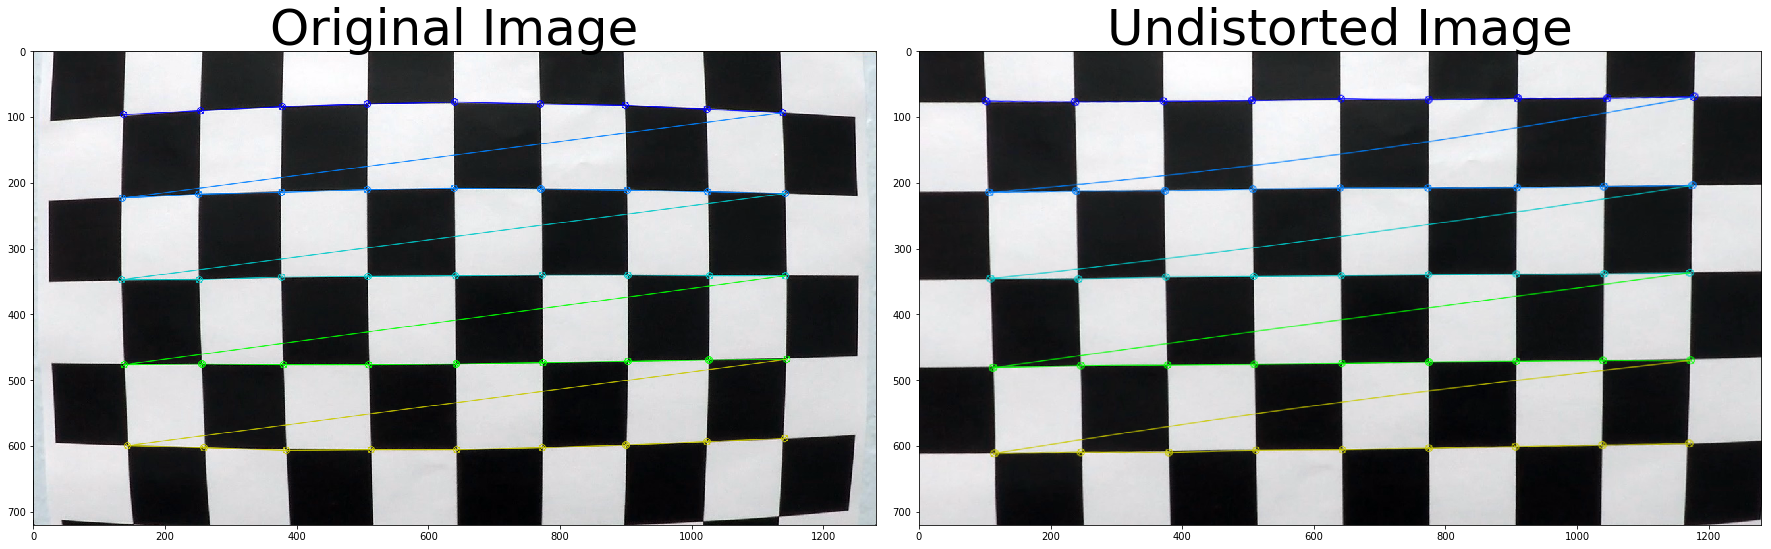

In [4]:
undistorted = cv2.undistort(image, mtx, dist, None, mtx)

## Show paris of an original images and a undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()